# Strategy Backtesting Using Python (DMP-1)
#### Notebook Created on:  25 Jan 2018
##### Last Update: 6 August 2018
##### Author: Vivek Krishnamoorthy

### Taking stock of where we are currently

We covered quite a bit of ground when we met last. I expect that you would have spent time reviewing it. 

One effective way to learn is to mess with the code I share with you. Tweak the values, create new variables and see what happens. Play around with the cells in the Jupyter Notebook to familiarize yourself with the Python syntax and figure out its features and limitations. **The benefits of running and experimenting with the shared code line by line yourself *by typing it in* will be a far better use of your time and effort than just reading about it.**

There're tons of references I'd provided in my previous class in case you want to delve deeper (I hope you have).

#### Some myths about programming ...

1. It's too late for me to learn it.

2. I need to have an engineering or computer science background to become a quant/algo trader.

3. I will have acquired all the needed knowledge if I go through the EPAT programming oriented sessions.

4. I have to be an expert level programmer to code trading strategies.

#### ... and some truisms

1. It's never too late. The internet is filled with inspiring experiences about people who learnt it quite 'late' in life. Check [this](https://www.google.co.in/search?hl=en&source=hp&ei=P_UpW9yqKcv5vgTs_oXYCw&q=programming+learning+late&oq=programming+learning+late&gs_l=psy-ab.3..0i22i30k1l10.1999.6123.0.6329.27.22.0.3.3.0.279.2152.0j13j1.15.0....0...1c.1.64.psy-ab..9.17.2170.0..0j0i131k1.130.ZbcQA9G_094) out.

2. Not true. To get comfortable with something, it has to start coming naturally to you. This will happen only if you practise everyday. I know I've said this ad nauseum. But really, there's no getting around it. Keep at it and you'll find that it gets easier and more fun.

3. It doesn't take very long to learn programming but months to become an expert. Read widely, watch videos, try stuff, fail, try again (Lather, rinse, repeat).

4. Not true. If you understand financial markets and are familiar with Python or R, you're good to go. The coding community is a vibrant and giving one. You'll find a lot of ninja level programmers actively engaged in troubleshooting and helping newcomers on online forums like [Stackoverflow](https://stackoverflow.com/). Use it when you encounter issues.

#### A handy and step-wise approach to Strategy Testing

1. Come up with a trading/strategy idea (this could come from something you read, or may be a gut instinct that needs to be tested - say, buying at Friday close and selling on the following Monday at market open).

2. Download the relevant data. Daily historical data is usually quite straightfoward to obtain, especially for stocks. Higher frequency data (5 minutely, minutely, etc.) however is expensive and you need to check this with your broker.

3. Think about the algorithm (a series of steps to buy and sell)
    * Build the indicator
    * Create the rule
    * Calculate returns, P & L, etc.
    
4. Do it stepwise and test each part once you write it.

5. Make sure you annotate your code with comments. If not, you'll spend hours trying to understand your own code when you revisit it after a few days.

6. Fragment the code. You don't need to run the data download part every single time. Save the data download part as a function or a separate script/file.

7. Contingency plan
    * What if the code to download data automatically doesn't work?
    * Download the data manually as a csv file and use it instead.


In [1]:
# !conda install data-reader # not needed here since we already installed it thru the command prompt

SyntaxError: invalid syntax (<ipython-input-1-19c9bfe9ce0a>, line 1)

```python

# The first step when we start to write a Python program is to import all the necessary
# libraries/packages with aliases if required. The aliases I've used are quite standardized 
# in scientific Python code that you come across

import pandas as pd
import numpy as np
import datetime
pd.core.common.is_list_like = pd.api.types.is_list_like # helps solving an error with datareader when it had an issue
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import os

os.getcwd()
os.chdir("C:\Work\EPAT\Python\Strategies") # You'll need to key in the directory relevant to your computer
# Here's where all the files pertaining to your program should be stored
```

In [67]:
import pandas as pd
import numpy as np
import datetime
pd.core.common.is_list_like = pd.api.types.is_list_like # helps solving an error with datareader when it had an issue
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import os



[pandas-datareader](http://pandas-datareader.readthedocs.io/en/latest/) is a popular library (other libraries include [quandl](https://www.quandl.com/tools/python), [nsepy](http://nsepy.readthedocs.io/en/latest/) etc.) used to pull financial data automatically from different web sources. However, the data sources often change and one needs to check the documentation from time to time to be updated. A few months ago, I would always download whatever data I needed through Yahoo Finance or Google Finance (when using `pandas-datareader`). They don't work anymore.

DATAREADER IS NOT A SUBLIBRARY OF PANDAS!!!

### A short detour - Dates and Times in Python

In Python ,there are a number of ways to represent dates, times, and time intervals between them. `pandas` and `NumPy` have their own ways of representing them. We will be mostly dealing with the `pandas` date formats since that is most relevant to quantitative finance. Nevertheless, it's useful to know how they relate with each other.

Two important methods within `datetime` which are also the same in `pandas` are `strptime` and `strftime`.
* `strptime` parses a string and **converts it to a `datetime` object**.
* `strftime` **converts a `datetime` object to a specified format string**.

As a mnemonic, I find it helpful to link the `p` in `strptime` to
* *parsing* a string to get a datetime object. 

And the `f` in `strftime` to 
* *formatting*  a `datetime` object to get a formatted string of our choice.

*I'd strongly suggest that you go through the use cases for these two methods and try them out (even if you don't try out the rest of the code pertaining to dates and times). Dealing with different formats of dates and times from disparate source files (since data could come from many potential data providers) is a pain we often encounter while dealing with financial data. [Here's](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) the official documentation on them.*

Native Python has a built-in `datetime` library and a third-party library [`dateutil`](https://dateutil.readthedocs.io/en/stable/) which supplies `date`, `datetime`, `time`, `timedelta` and other objects. There are many useful functionalities that you can perform using them. However, while working with large datasets, they are inefficient compared to better available date formats in `pandas` or `NumPy`.

`NumPy` has the `datetime64` data type which encodes dates as 64-bit integers. It's named so because the name `datetime` was already taken by the `datetime` library in native Python. Some of the objects follow the convenient nomenclature of `64` suffixed at the end of their native Python names. Ex. `datetime64`, `timedelta64`.

`pandas` provides a `Timestamp` object which is like the best of both worlds. It's got the user-friendliness of `datetime` and `dateutil` and the efficiency of `NumPy's datetime64`. It is interchangeable with Python's `datetime` in most cases.

**`DatetimeIndex` is a `pandas` index object formed by combining multiple entries of `Timestamp` objects.**

***Some use cases which you can try on your own time if you wish.***

```python
## Native Python
import datetime
a = datetime.datetime(year=2018, month=6, day=10)
print("a", type(a))

a2 = datetime.datetime.now()
print("a2", type(a2))

a3 = datetime.datetime.now().date()
print("a3", type(a3))

a3.strftime("%A")
a2.strftime("%a")

a4date = "18 Nov 2011"
a5 = datetime.datetime.strptime(a4date,"%d %b %Y").date()

from dateutil import parser
a5 = parser.parse("10th Oct 2014")
a5
print("a5", type(a5))
```

In [17]:
import datetime
datetime.datetime?


In [3]:
import datetime
a = datetime.datetime(year=2018, month=6, day=10)
print(a, "a", type(a))


2018-06-10 00:00:00 a <class 'datetime.datetime'>


In [18]:
a2 = datetime.datetime.now() #give exact moment at the millisecond
print(a2, "a2", type(a2))

2018-12-05 23:02:42.821555 a2 <class 'datetime.datetime'>


In [19]:
a3 = datetime.datetime.now().date()
print(a3, "a3", type(a3))

2018-12-05 a3 <class 'datetime.date'>


In [21]:
a3.strftime("%A") # %A is a short form for the day in complete spelling

'Wednesday'

In [22]:
a3.strftime("%d %m %y")

'05 12 18'

In [9]:
a2.strftime("%a")

'Wed'

In [29]:
a4date = "18 Nov 2011"
a4 = datetime.datetime.strptime(a4date,"%d %b %Y").date()
print(a4)

2011-11-18


In [30]:
from dateutil import parser  # very useful when data comes in this format
a5 = parser.parse("10th Oct 2014")
a5
print(a5, "a5", type(a5))

2014-10-10 00:00:00 a5 <class 'datetime.datetime'>


```python
## NumPy Datetimes
## numpy encodes dates as 64bits integers, so can store dates to nanoseconds, so super cool for HFT
import numpy as np
b = np.datetime64("2016-04-15")

b2 = np.datetime64("2017-11") # only specifying month and year

b3 = np.arange('2015-08', '2015-09', dtype='datetime64[D]') # getting all the dates for a month

np.datetime64('2018-01-01') + np.timedelta64(25, 'D')
```

In [32]:
import numpy as np

b = np.datetime64("2016-04-15")
b

numpy.datetime64('2016-04-15')

In [34]:
b2 = np.datetime64("2017-11") # only specifying month and year
b2

numpy.datetime64('2017-11')

In [40]:
b3 = np.arange('2015-08', '2015-09', dtype='datetime64[D]') # getting all the dates for a month. Arange method excludes the stop date
print(b3)

['2015-08-01' '2015-08-02' '2015-08-03' '2015-08-04' '2015-08-05'
 '2015-08-06' '2015-08-07' '2015-08-08' '2015-08-09' '2015-08-10'
 '2015-08-11' '2015-08-12' '2015-08-13' '2015-08-14' '2015-08-15'
 '2015-08-16' '2015-08-17' '2015-08-18' '2015-08-19' '2015-08-20'
 '2015-08-21' '2015-08-22' '2015-08-23' '2015-08-24' '2015-08-25'
 '2015-08-26' '2015-08-27' '2015-08-28' '2015-08-29' '2015-08-30'
 '2015-08-31']


In [39]:
b4 = np.arange('2015-08', '2015-09', dtype='datetime64[M]') 
b4

array(['2015-08'], dtype='datetime64[M]')

In [41]:
len(b3)

31

In [42]:
len(b4)

1

In [44]:
print(np.datetime64('2018-01-01') + np.timedelta64(25, 'D'))

2018-01-26


```python
## pandas Timestamps

import pandas as pd

c = pd.to_datetime("10th Sept 2016") # super cool method that converts many formats into pandas' native date format
c
print("c", type(c))
c.strftime("%B")

c2 = c + pd.to_timedelta(np.arange(20), 'D')
c2
print("c2", type(c2))

c3 = pd.Timestamp('2017-03-15')
c3
print("c3", type(c3))

```

You can read and try some examples on this from [here](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html).

In [45]:
import pandas as pd

c = pd.to_datetime("10th Sept 2016")
c


Timestamp('2016-09-10 00:00:00')

In [57]:
type(c)

pandas._libs.tslibs.timestamps.Timestamp

In [59]:
c.strftime("%A %B %Y")

'Saturday September 2016'

In [62]:
c.strftime("%a %b %y")

'Sat Sep 16'

In [63]:
c.strftime("%d %m %y")

'10 09 16'

In [47]:
c = pd.to_datetime("Sept 10 2016")
c

Timestamp('2016-09-10 00:00:00')

In [48]:
c = pd.to_datetime("september 10, 2016")
c

Timestamp('2016-09-10 00:00:00')

In [56]:
c2 = c + pd.to_timedelta(np.arange(20), 'D') # take a range from 0 to 19. np.arange(20)=[0,1,2,..19]
c2
print(c2, "c2", type(c2))



DatetimeIndex(['2016-09-10', '2016-09-11', '2016-09-12', '2016-09-13',
               '2016-09-14', '2016-09-15', '2016-09-16', '2016-09-17',
               '2016-09-18', '2016-09-19', '2016-09-20', '2016-09-21',
               '2016-09-22', '2016-09-23', '2016-09-24', '2016-09-25',
               '2016-09-26', '2016-09-27', '2016-09-28', '2016-09-29'],
              dtype='datetime64[ns]', freq=None) c2 <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [64]:
c3 = pd.Timestamp('2017-03-15')
c3
print(c3, "c3", type(c3))

2017-03-15 00:00:00 c3 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


### Downloading and loading the data in a pandas DataFrame

We will now use the `pandas-datareader` to automatically download the required data for the Microsoft stock price. In case you're having trouble with the download, please use the `csv` file that's been provided to you and run the relevant code.


```python

end = datetime.datetime.now().date()
start = end - pd.Timedelta(days = 365 * 10)
df = web.DataReader("MSFT", "quandl", start, end)

## IMPORTANT: Please run the below line only if your pandas-datareader doesn't work

df = pd.read_csv("MSFT.csv", index_col=0, parse_dates=True)

```

In [84]:
end = datetime.datetime.now().date()
start = end - pd.Timedelta(days = 365 * 10) #download data for the last 10 years
print("start:", start, "end:", end)
type(end)

start: 2008-12-07 end: 2018-12-05


datetime.date

In [69]:
df = web.DataReader("MSFT", "quandl", start, end) # web is the alias for data_reader, which we downloaded already
df.to_csv("MSFT.csv") # to save the downloaded file as csv

ValueError: The Quandl API key must be provided either through the api_key variable or through the environmental variable QUANDL_API_KEY.

In [70]:
# we can't dl from quandl apparently cuz it needs a key which i dont know (need to sign up with Quandl, so let's use the provided csv
df = pd.read_csv("MSFT.csv", index_col=0, parse_dates=True)

Let's now examine `df`, our `pandas DataFrame` closely.

```python

df.head()
df.tail()
df.shape
df.describe()
df.info()
```

You'll notice that the order of entries is from the latest to the oldest. This is the way in which data gets downloaded via Quandl. We will encounter quirks such as these with different data vendors. And a significant part of our job when we work on programming quant trading strategies, is data munging and cleaning.

```python
# We reindex our dataframe so as to get the data ordered the way we'd prefer

df = df.reindex(index=df.index[::-1])
df.head()
df.tail()

```

In [83]:
print(df.head(), "\n")
print(df.tail(), "\n")
print(df.shape, "\n")
print(df.describe(), "\n")
df.info()

              Open    High    Low  Close      Volume  ExDividend  SplitRatio  \
Date                                                                           
2018-03-27  94.940  95.139  88.51  89.47  53704562.0         0.0         1.0   
2018-03-26  90.610  94.000  90.40  93.78  55031149.0         0.0         1.0   
2018-03-23  89.500  90.460  87.08  87.18  42159397.0         0.0         1.0   
2018-03-22  91.265  91.750  89.66  89.79  37578166.0         0.0         1.0   
2018-03-21  92.930  94.050  92.21  92.48  23753263.0         0.0         1.0   

            AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
Date                                                        
2018-03-27   94.940   95.139   88.51     89.47  53704562.0  
2018-03-26   90.610   94.000   90.40     93.78  55031149.0  
2018-03-23   89.500   90.460   87.08     87.18  42159397.0  
2018-03-22   91.265   91.750   89.66     89.79  37578166.0  
2018-03-21   92.930   94.050   92.21     92.48  23753263.0   

          

In [86]:
# We reindex our dataframe so as to get the data ordered the way we'd prefer

df = df.reindex(index=df.index[::-1]) # can also do df=df[:: -1]
print(df.head(), "\n")
df.tail()

             Open   High    Low  Close       Volume  ExDividend  SplitRatio  \
Date                                                                          
2008-12-05  18.91  19.98  18.47  19.87   91996200.0         0.0         1.0   
2008-12-08  20.35  21.25  20.14  21.01  107225000.0         0.0         1.0   
2008-12-09  20.62  21.25  20.46  20.60   80484900.0         0.0         1.0   
2008-12-10  20.82  20.96  20.30  20.61   61499000.0         0.0         1.0   
2008-12-11  20.11  20.12  19.31  19.45   83564300.0         0.0         1.0   

              AdjOpen    AdjHigh     AdjLow   AdjClose    AdjVolume  
Date                                                                 
2008-12-05  15.013516  15.863038  14.664180  15.775704   91996200.0  
2008-12-08  16.156798  16.871349  15.990069  16.680802  107225000.0  
2008-12-09  16.371163  16.871349  16.244132  16.355284   80484900.0  
2008-12-10  16.529952  16.641105  16.117101  16.363224   61499000.0  
2008-12-11  15.966251  15.

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-21,92.930,94.050,92.21,92.48,23753263.0,0.0,1.0,92.930,94.050,92.21,92.48,23753263.0
2018-03-22,91.265,91.750,89.66,89.79,37578166.0,0.0,1.0,91.265,91.750,89.66,89.79,37578166.0
2018-03-23,89.500,90.460,87.08,87.18,42159397.0,0.0,1.0,89.500,90.460,87.08,87.18,42159397.0
2018-03-26,90.610,94.000,90.40,93.78,55031149.0,0.0,1.0,90.610,94.000,90.40,93.78,55031149.0
2018-03-27,94.940,95.139,88.51,89.47,53704562.0,0.0,1.0,94.940,95.139,88.51,89.47,53704562.0


### Visualizing your Data

Let me remind you that [Matplotlib](https://matplotlib.org/) is a plotting library extensively used in quantitative finance and other fields to produce pretty graphs and figures. We'll be primarily using it as a visualization tool.

Visualizing is a nice way to get a 'feel' for your dataset and understand the story that your data tells you.

We'll first take a look at the `matplotlib` library's `plot()` function.

You can think of it as a quick and dirty way (this method would be like comfort food for MATLAB users who are used to this kind of API) to get a visual representation of your data. 

The below method uses a MATLAB-style API. It's easy and convenient but it comes at a cost. The simpler customizations that you may want such as manipulating the axes, adding labels, etc. can be easily done. 

However, if you want to say, change the font used, plot multiple charts in one figure, use LaTeX for scientific notations, etc., you'll need to use the other method (let's call it the Python-style API for convenience).
```python

plt.figure(figsize=(14, 9))
plt.plot(df['AdjHigh'], linewidth=0.5, label='Adjusted High')
plt.plot(df['AdjLow'], linewidth=0.5, label='Adjusted Low')
plt.plot(df['AdjClose'], linewidth=0.5, label='Adjusted Close')
plt.grid(True)
plt.title('Microsoft Price Movements')
plt.xlabel('Time')
plt.ylabel('Price')
#plt.axis('tight')
#plt.tight_layout()
plt.legend()
plt.show()

```

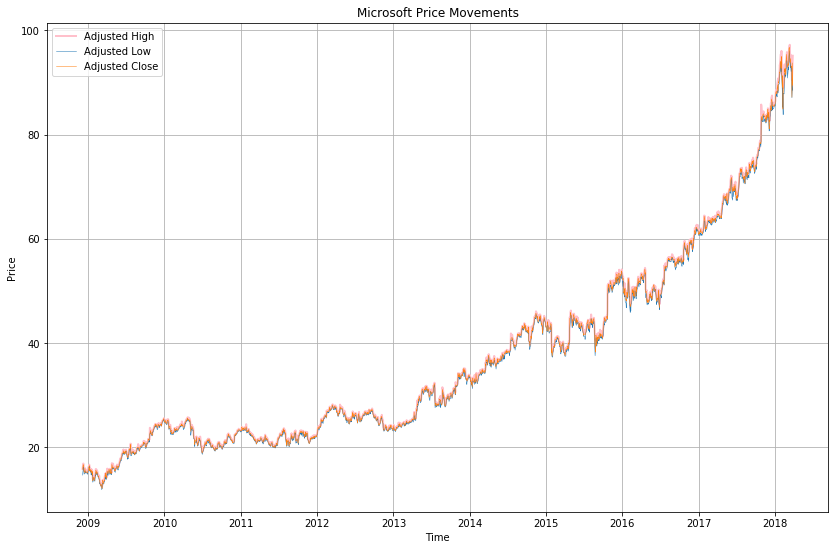

In [93]:
plt.figure(figsize=(14, 9)) #width and height, whatever is comfortable on my screen
plt.plot(df['AdjHigh'], linewidth=2, label='Adjusted High', color="pink")
plt.plot(df['AdjLow'], linewidth=0.5, label='Adjusted Low')
plt.plot(df['AdjClose'], linewidth=0.5, label='Adjusted Close')
plt.grid(True) # make the grid appear
plt.title('Microsoft Price Movements')
plt.xlabel('Time')
plt.ylabel('Price')
plt.axis('tight') # we dont want the x and y axis to go much beyond the data
#plt.tight_layout()
plt.legend()
plt.show()

An even quicker way to plot graphs when you're dealing with `pandas` is the `.plot()` method directly as shown. The `.plot()` method is a wrapper around `matplotlib's` `plot()` function. THIS IS A PANDAS METHOD.

```python

df[['AdjHigh', 'AdjLow', 'AdjClose']].plot(grid=True, linewidth=0.5, figsize=(14, 9 ))
df['Volume'].plot(grid=True, linewidth=0.5, figsize=(14, 9))
```

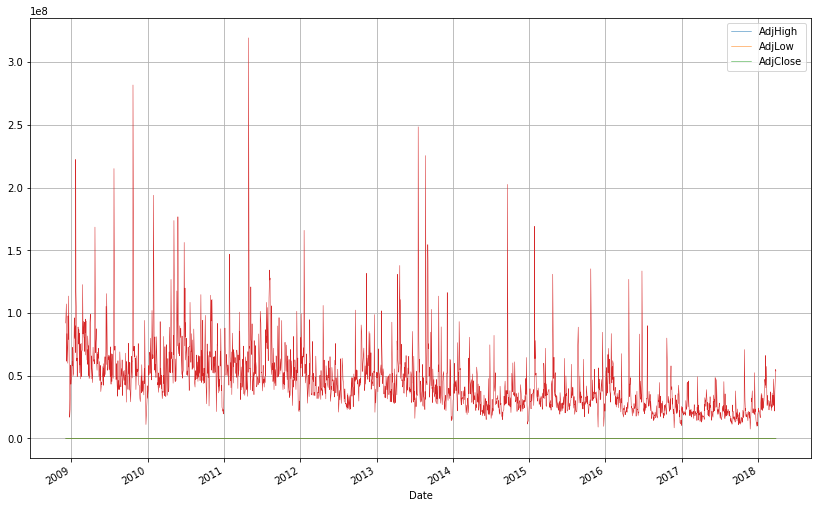

In [106]:
#%matplotlib inline #if doesnt work in the workbook
df[['AdjHigh', 'AdjLow', 'AdjClose']].plot(grid=True, linewidth=0.5, figsize=(14, 9 ))
df['Volume'].plot(grid=True, linewidth=0.5, figsize=(14, 9 ))
# here we see that the volume data is overwhelming the price data

The Python-syle API exploits the Object Oriented API style of Python. I've provided two illustrative examples below. Notice the difference in styles.
There's a bit more typing to do here. It may not appear obvious why this is a better method in the long run. Suffice to say that as you start producing more complex charts, the more explicit use of objects makes it more customizable to suit your needs.

We will not be using this method for today. However, I'm flagging it as a topic that can be explored as you get better at writing programs. [This](http://www.scipy-lectures.org/intro/matplotlib/index.html) is a good place to rev up your charting skills.

```python
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 9))
### subplots() creates axes on a chart
for i in ['AdjHigh', 'AdjLow', 'AdjClose']:
    curr_label = i
    ax.plot(df[i], linewidth=0.5, label=curr_label)
ax.legend()
ax.grid()
ax.set
plt.show()


fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(14, 9))
ax1.plot(df['AdjHigh'], linewidth=0.5, label='Adjusted High')
ax1.plot(df['AdjLow'], linewidth=0.5, label='Adjusted Low')
ax1.plot(df['AdjClose'], linewidth=0.5, label='Adjusted Close')
ax1.grid(True)
ax1.legend()
ax2=ax1.twinx() # plots the specified dataset using the second axis (right)
ax2.plot(df['AdjVolume'], linewidth=1, label='Volume')
ax2.legend()
plt.show()

```



<function matplotlib.pyplot.show(*args, **kw)>

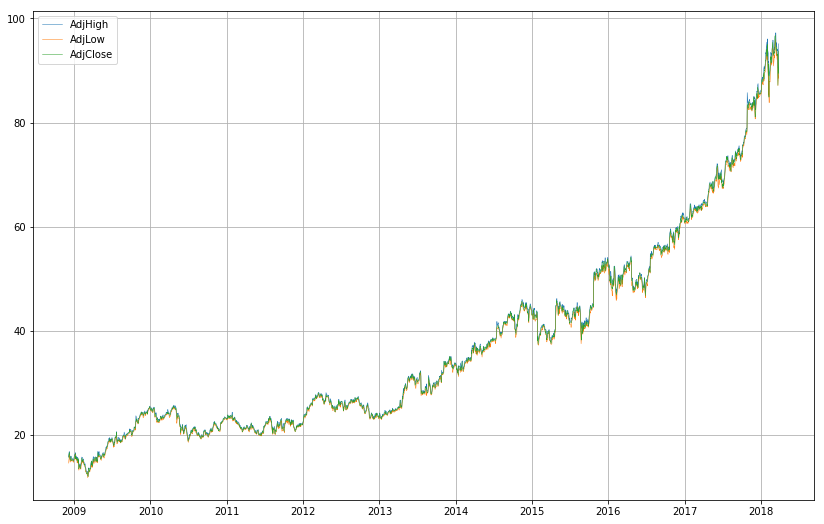

In [100]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 9))
### subplots() creates axes on a chart
for i in ['AdjHigh', 'AdjLow', 'AdjClose']:
    curr_label = i
    ax.plot(df[i], linewidth=0.5, label=curr_label)
ax.legend()
ax.grid()
ax.set
plt.show


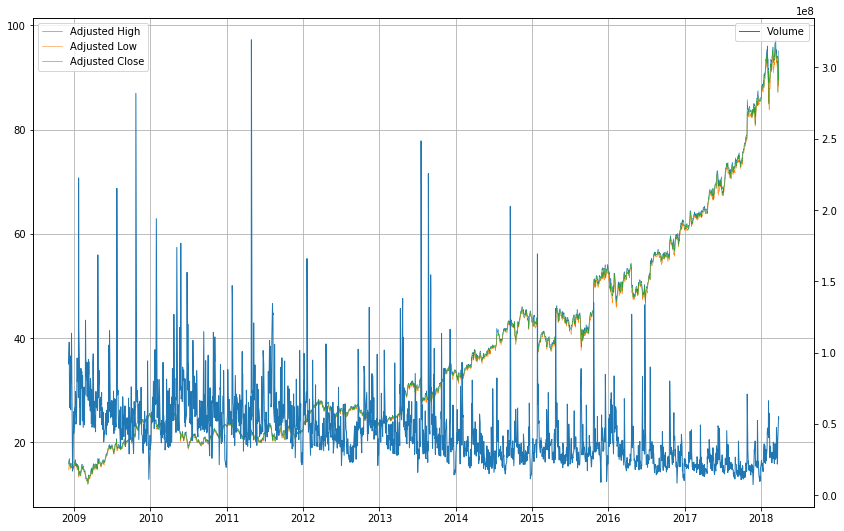

In [101]:
#with volume data on a secondary axis
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(14, 9))
ax1.plot(df['AdjHigh'], linewidth=0.5, label='Adjusted High')
ax1.plot(df['AdjLow'], linewidth=0.5, label='Adjusted Low')
ax1.plot(df['AdjClose'], linewidth=0.5, label='Adjusted Close')
ax1.grid(True)
ax1.legend()
ax2=ax1.twinx() # plots the specified dataset using the second axis (right)
ax2.plot(df['AdjVolume'], linewidth=1, label='Volume')
ax2.legend()
plt.show()

### Strategy # 1: The Modified Faber Strategy

One of the most downloaded papers on the SSRN portal is [A Quantitative Approach to Tactical Asset Allocation](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=962461) by Meb Faber. We shall refer to this approach as the 'Faber strategy'.

We modify the Faber strategy to demonstrate a somewhat simplified version of the same.

This is a long only strategy

We shall compute the 200-day Simple Moving Average (henceforth referred to as 'SMA200' or '10-month SMA') and compare it with the Close prices each day. There are two conditions which we shall check each day.

1. If the price is greater than the SMA200, we will buy one Microsoft stock. We shall then continue to stay invested until the Close price dips below SMA200.

2. When this happens, we will sell our MSFT stock and stay out of the market until our first condition is again satisfied.

Our trading rules can be stated as

* Buy when Price > 10-month SMA (since there are approx. 200 trading days in 10 months) and have no open position (cash on hand !=0)
* Sell and move to Cash when Price < 10-month SMA and have open position (cash on hand=0)





```python
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
```

In [114]:
# get the data that we need in our dataframe df that contains MSFT, and work on copies only. Keep the original intact.
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

Here i create 2 flags (booleans), one is cash, the other is stock. I have only one or the other. At the beginning i have cash but no stock. Once im in a position, I have no cash but I have stock. 

```python
buyPrice = 0
sellPrice = 0
maWealth = 1.0 #moving average 
cash = 1 
stock = 0
sma = 200

ma = np.round(df1['AdjClose'].rolling(window=sma, center=False).mean(), 2) # create a series for moving average
n_days = len(df1['AdjClose'])

# ma.iloc[sma-2:205]
```

In [109]:
buyPrice = 0
sellPrice = 0
maWealth = 1.0 # this is basically our equity, which we track as a % change in our wealth
cash = 1 
stock = 0
sma = 200

ma = np.round(df1['AdjClose'].rolling(window=sma, center=False).mean(), 2) # create a series for moving average
n_days = len(df1['AdjClose'])



In [110]:
n_days

2341

In [120]:
print(ma.head(), "\n") # Since it s a 200 SMA, we will have NaN for the first 199 dates
print(ma.tail()) 

Date
2008-12-05   NaN
2008-12-08   NaN
2008-12-09   NaN
2008-12-10   NaN
2008-12-11   NaN
Name: AdjClose, dtype: float64 

Date
2018-03-21    80.36
2018-03-22    80.45
2018-03-23    80.53
2018-03-26    80.64
2018-03-27    80.73
Name: AdjClose, dtype: float64


In [122]:
ma.iloc[sma-2:205] # Here is the date where the SMA yields a non-NaN value

Date
2009-09-21      NaN
2009-09-22    16.66
2009-09-23    16.68
2009-09-24    16.71
2009-09-25    16.73
2009-09-28    16.75
2009-09-29    16.78
Name: AdjClose, dtype: float64

```python

closePrices = df1['AdjClose']
# initialize lists. 
buy_data = [] #Captures all my buy prices 
sell_data = [] #Captures all my sell prices

trade_price = [] #Captures all my buy and sell prices

wealth = [] # this is the equity curve

for d in range(sma-1, n_days): # no need to run thru the first 199 days since they are NaN. We stop the loop on the day bedore the end, since the last action can only be taken the day after the signal (range goes up to n-1). If at the end of the backtest we sit on cash, no problem. If we are in a long position, P&l for this trade wont be computed because that line in in the sell rule block. If len(wealth) is an odd number, we know we end the backtest long MSFT
    
    # Buy if stock price > MA & if not bought yet
    if closePrices[d] > ma[d] and cash == 1:
        buyPrice = closePrices[d + 1] # buy the next day, otherwise that's be a look ahead bias
        buy_data.append(buyPrice)
        trade_price.append(buyPrice)
        cash = 0
        stock = 1
        
    # Sell if stock price < MA and if you have a stock to sell
    
    if closePrices[d] < ma[d] and stock == 1:
        sellPrice = closePrices[d + 1]
        sell_data.append(sellPrice)
        trade_price.append(sellPrice)
        cash = 1
        stock = 0
        maWealth = maWealth * (sellPrice / buyPrice) # we update the P&L once we sell. 
        wealth.append(maWealth)

tp = pd.DataFrame(trade_price)
wealth.insert(0, 1)
w = pd.DataFrame(wealth)
plt.plot(w)
```

In [124]:
closePrices = df1['AdjClose']
# initialize lists. 
buy_data = [] #Captures all my buy prices 
sell_data = [] #Captures all my sell prices

trade_price = [] #Captures all my buy and sell prices

wealth = [] # this is the equity curve

for d in range(sma-1, n_days): # no need to run thru the first 199 days since they are NaN. We stop the loop on the day bedore the end, since the last action can only be taken the day after the signal (range goes up to n-1). If at the end of the backtest we sit on cash, no problem. If we are in a long position, P&l for this trade wont be computed because that line in in the sell rule block. If len(wealth) is an odd number, we know we end the backtest long MSFT
    
    # Buy if stock price > MA & if not bought yet
    if closePrices[d] > ma[d] and cash == 1:
        buyPrice = closePrices[d + 1] # buy the next day, otherwise that's be a look ahead bias
        buy_data.append(buyPrice)
        trade_price.append(buyPrice)
        cash = 0
        stock = 1
        
    # Sell if stock price < MA and if you have a stock to sell
    
    if closePrices[d] < ma[d] and stock == 1:
        sellPrice = closePrices[d + 1]
        sell_data.append(sellPrice)
        trade_price.append(sellPrice)
        cash = 1
        stock = 0
        maWealth = maWealth * (sellPrice / buyPrice) # we update the P&L once we sell. 
        wealth.append(maWealth)

In [128]:
wealth.insert(0, 1) #insert 1 in position 0, since we started with weath of 1

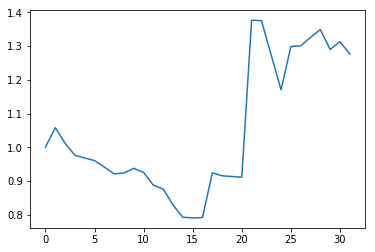

In [133]:
w = pd.DataFrame(wealth) # convert python list into pandas dataframe to use the .plot wrapper
plt.plot(w)


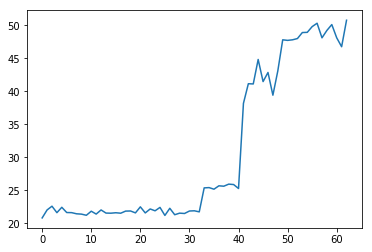

In [131]:
tp = pd.DataFrame(trade_price) # not so informative since no distinction between buy and sell signals
plt.plot(tp)

Plotting the 10-month SMA and the Close prices

```python

df1['SMA200'] = ma

plt.figure(figsize=(14, 9))
plt.plot(df1['AdjClose'], linewidth=0.5, label='Adjusted Close')
plt.plot(df1['SMA200'], linewidth=0.5, label='200-day Moving Average')
plt.grid(True)
plt.title('Microsoft Stock Price History')
plt.xlabel('Time')
plt.ylabel('Price')
#plt.axis('tight')
#plt.tight_layout()
plt.legend()
plt.show()
# %matplotlib inline
# %matplotlib qt
```


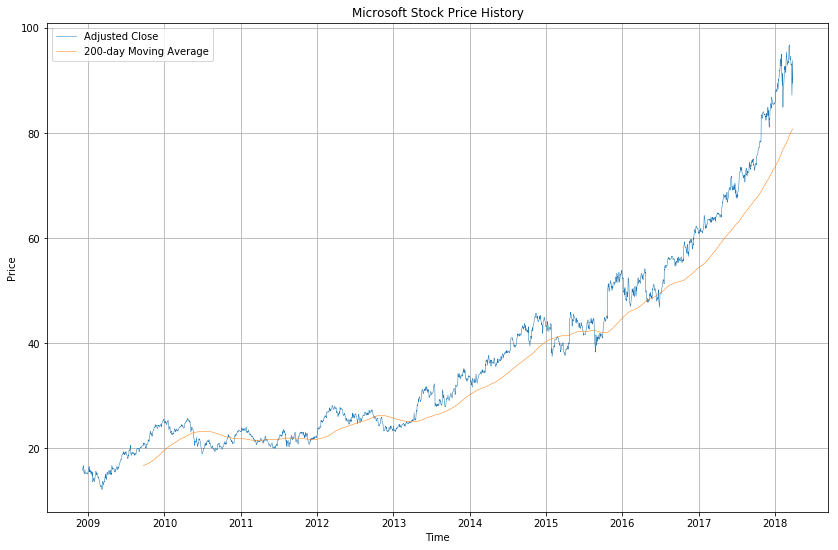

In [134]:
df1['SMA200'] = ma

plt.figure(figsize=(14, 9))
plt.plot(df1['AdjClose'], linewidth=0.5, label='Adjusted Close')
plt.plot(df1['SMA200'], linewidth=0.5, label='200-day Moving Average')
plt.grid(True)
plt.title('Microsoft Stock Price History')
plt.xlabel('Time')
plt.ylabel('Price')
#plt.axis('tight')
#plt.tight_layout()
plt.legend()
plt.show()
# %matplotlib inline
# %matplotlib qt

### Strategy # 2: The Moving Average Crossover Strategy

This is a well-known trading technique and considered to be the 'Hello World' of algorithmic/quantitative trading. It's essentially a way to take advantage of the momentum or trend in stock price movements.


Here we always have a position on. We re either long or short

We shall have two SMA filters viz. the shorter lookback period SMA (henceforth referred to as  'SMA50') and the longer lookback period SMA (henceforth referred to as 'SMA150'). We will go long on Microsoft *at the first instance* (IE, THE CROSS OVER POINT) when the SMA50 exceeds the SMA150. Similarly, we will go short on Microsoft, *at the first instance* when the SMA150 exceeds the SMA50. This strategy can work well when the price movements of the asset trend in a particular direction (upwards or downwards) persistently before slowly reversing their drift.

Our trading rules can be stated as

* Go long when SMA50 > SMA150 on a given day and SMA50 < SMA150 on the previous day
* Go short when SMA50 < SMA150 on a given day and SMA50 > SMA150 on the previous day



```python

m = 50 # defining the shorter lookback period
n = 150 # defining the longer lookback period

df2['SMA50'] = df2['AdjClose'].rolling(window=m, center=False).mean()
df2['SMA150'] = df2['AdjClose'].rolling(window=n, center=False).mean()
```

In [135]:
m = 50 # defining the shorter lookback period
n = 150 # defining the longer lookback period

df2['SMA50'] = df2['AdjClose'].rolling(window=m, center=False).mean()
df2['SMA150'] = df2['AdjClose'].rolling(window=n, center=False).mean()

In [138]:
df2.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,SMA50,SMA150
Date,,,,,,,,,,,,,,
2008-12-05,18.91,19.98,18.47,19.87,91996200.0,0.0,1.0,15.013516,15.863038,14.664180,15.775704,91996200.0,NaN,NaN
2008-12-08,20.35,21.25,20.14,21.01,107225000.0,0.0,1.0,16.156798,16.871349,15.990069,16.680802,107225000.0,NaN,NaN
2008-12-09,20.62,21.25,20.46,20.60,80484900.0,0.0,1.0,16.371163,16.871349,16.244132,16.355284,80484900.0,NaN,NaN
2008-12-10,20.82,20.96,20.30,20.61,61499000.0,0.0,1.0,16.529952,16.641105,16.117101,16.363224,61499000.0,NaN,NaN
2008-12-11,20.11,20.12,19.31,19.45,83564300.0,0.0,1.0,15.966251,15.974190,15.331094,15.442247,83564300.0,NaN,NaN


We'll now plot the key variables and see how they look.
```python

df2[['AdjClose', 'SMA50', 'SMA150']].plot(grid=True, linewidth=0.5)
```

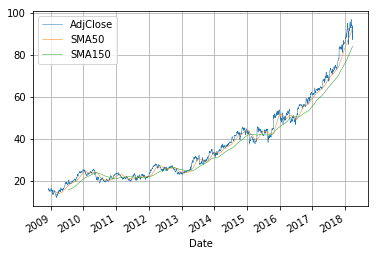

In [136]:
df2[['AdjClose', 'SMA50', 'SMA150']].plot(grid=True, linewidth=0.5)

In [140]:
df2.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'ExDividend'], axis=1, inplace=True)

In [142]:

df2['SMA50_2'] = df2['AdjClose'].rolling(window=m, center=False).mean().shift(1)
df2['SMA150_2'] = df2['AdjClose'].rolling(window=n, center=False).mean().shift(1)

In [144]:
df2.tail()

,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,SMA50,SMA150,SMA50_2,SMA150_2
Date,,,,,,,,,,
2018-03-21,1.0,92.930,94.050,92.21,92.48,23753263.0,92.0506,83.559304,91.9666,83.428314
2018-03-22,1.0,91.265,91.750,89.66,89.79,37578166.0,92.0820,83.672229,92.0506,83.559304
2018-03-23,1.0,89.500,90.460,87.08,87.18,42159397.0,92.0692,83.764902,92.0820,83.672229
2018-03-26,1.0,90.610,94.000,90.40,93.78,55031149.0,92.1832,83.909866,92.0692,83.764902
2018-03-27,1.0,94.940,95.139,88.51,89.47,53704562.0,92.1810,84.025499,92.1832,83.909866


We've now computed all of what we need to generate trading signals. Let's go ahead and now do that. Use NP.WHERE which returns the index numbers where the condition is true. This will be an array like false, true, false, etc. If I add 1, 0 after the condition in the arguments of .where, it will return 1 if true, 0 if false

```python
df2['Signal'] = np.where((df2['SMA50'] > df2['SMA150']) 
                        & (df2['SMA50_2'] < df2['SMA150_2']), 1, 0)
df2['Signal'] = np.where((df2['SMA50'] < df2['SMA150']) 
                        & (df2['SMA50_2'] > df2['SMA150_2']), -1, df2['Signal'])
```

In [152]:
df2['Signal'] = np.where((df2['SMA50'] > df2['SMA150']) 
                        & (df2['SMA50_2'] < df2['SMA150_2']), 1, 0) # looking for long signal where the output will be 1
df2['Signal'] = np.where((df2['SMA50'] < df2['SMA150']) 
                        & (df2['SMA50_2'] > df2['SMA150_2']), -1, df2['Signal']) # then overwrite 0s or 1s with -1 when short signal


In [150]:
df2.tail()

,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,SMA50,SMA150,SMA50_2,SMA150_2,Signal
Date,,,,,,,,,,,
2018-03-21,1.0,92.930,94.050,92.21,92.48,23753263.0,92.0506,83.559304,91.9666,83.428314,0
2018-03-22,1.0,91.265,91.750,89.66,89.79,37578166.0,92.0820,83.672229,92.0506,83.559304,0
2018-03-23,1.0,89.500,90.460,87.08,87.18,42159397.0,92.0692,83.764902,92.0820,83.672229,0
2018-03-26,1.0,90.610,94.000,90.40,93.78,55031149.0,92.1832,83.909866,92.0692,83.764902,0
2018-03-27,1.0,94.940,95.139,88.51,89.47,53704562.0,92.1810,84.025499,92.1832,83.909866,0


In [153]:
# now add columns in the dataframe to store transaction prices
#lambda is a trow away function. we dont have to use that, we could create a normal one and call it.
#Here lambda is looking for the buy or sell signal and picks up that transaction price, else it stores 0.
# the axis = 1 says this is done for every row

df2['Buy'] = df2.apply(lambda x : x['AdjClose'] if x['SMA50'] > x['SMA150'] 
                        and x['SMA50_2'] < x['SMA150_2'] else 0, axis=1)

df2['Sell'] = df2.apply(lambda y : -y['AdjClose'] if y['SMA50'] < y['SMA150'] # notice the negative sign for short prices
                        and y['SMA50_2'] > y['SMA150_2'] else 0, axis=1)

df2['TP'] = df2['Buy'] + df2['Sell']
df2['TP']=df2['TP'].replace(to_replace=0, method='ffill') # we combine the buy and sell prices and fill the 0s with last.

df2['Position'] = df2['Signal'].replace(to_replace=0, method= 'ffill') # will be used for long/short multiplier
df2.tail()

,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,SMA50,SMA150,SMA50_2,SMA150_2,Signal,Buy,Sell,TP,Position
Date,,,,,,,,,,,,,,,
2018-03-21,1.0,92.930,94.050,92.21,92.48,23753263.0,92.0506,83.559304,91.9666,83.428314,0,0.0,0.0,54.739459,1
2018-03-22,1.0,91.265,91.750,89.66,89.79,37578166.0,92.0820,83.672229,92.0506,83.559304,0,0.0,0.0,54.739459,1
2018-03-23,1.0,89.500,90.460,87.08,87.18,42159397.0,92.0692,83.764902,92.0820,83.672229,0,0.0,0.0,54.739459,1
2018-03-26,1.0,90.610,94.000,90.40,93.78,55031149.0,92.1832,83.909866,92.0692,83.764902,0,0.0,0.0,54.739459,1
2018-03-27,1.0,94.940,95.139,88.51,89.47,53704562.0,92.1810,84.025499,92.1832,83.909866,0,0.0,0.0,54.739459,1


In [158]:
# how many signals do we have?
df2['Signal'].value_counts()
# In the period, we've chosen, this is in line with what we see in k

 0    2327
 1       7
-1       7
Name: Signal, dtype: int64

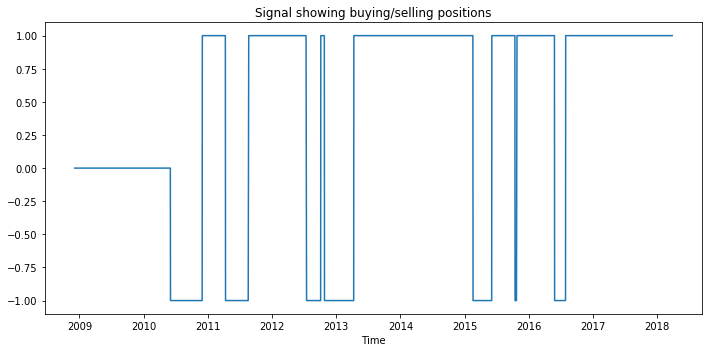

In [162]:
# Alternate way to plot the graph
plt.figure(figsize=(10, 5))
plt.plot(df2['Position'])
plt.title("Signal showing buying/selling positions")
plt.xlabel('Time')
plt.tight_layout()
plt.show()

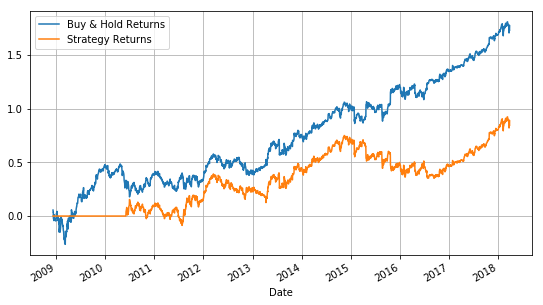

In [172]:
# Compute and plot the returns, throw in the buy and hold while you're at it:
df2['Buy & Hold Returns'] = np.log(df2['AdjClose'] / df2['AdjClose'].shift(1)) #CHECK THAT LOG THING HERE. SCALING?
df2['Strategy Returns'] = df2['Buy & Hold Returns'] * df2['Position'].shift(1)

df2[['Buy & Hold Returns', 'Strategy Returns']].cumsum().plot(grid=True, figsize=(9,5))


In [159]:
#for visualization, omit all the initial days when we are not in a trade

# get the index numbers of the non zero elements of TP 
#(essentially the days when we are in a trade, pretty much everyday except the beginning up to our first signal)

k = df2['TP'].nonzero() 

print(type(k)) # this tells us k is a tuple
print(k[0]) #this gives us a numpy array
print(type(k[0])) #confirms that this is a numpy ndarray
print(len(k[0])) # total number of positions

<class 'tuple'>
[ 374  375  376 ... 2338 2339 2340]
<class 'numpy.ndarray'>
1967


In [161]:
#now create a new data frame with only the relevant rows, ie, when the trading starts
frame = df2.iloc[k]
frame.head()

,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,SMA50,SMA150,SMA50_2,SMA150_2,Signal,Buy,Sell,TP,Position
Date,,,,,,,,,,,,,,,
2010-06-03,1.0,21.775017,22.086674,21.660195,22.029264,67837000.0,23.871719,23.897028,23.919038,23.904401,-1,0.0,-22.029264,-22.029264,-1
2010-06-04,1.0,21.405949,21.791420,21.012276,21.151702,89832200.0,23.810604,23.886880,23.871719,23.897028,0,0.0,0.000000,-22.029264,-1
2010-06-07,1.0,21.176306,21.184508,20.700618,20.741626,80456200.0,23.735409,23.872919,23.810604,23.886880,0,0.0,0.000000,-22.029264,-1
2010-06-08,1.0,20.708820,20.717021,20.216729,20.593999,87355000.0,23.662977,23.860617,23.735409,23.872919,0,0.0,0.000000,-22.029264,-1
2010-06-09,1.0,20.684215,20.930261,20.298744,20.331550,87794000.0,23.586439,23.845756,23.662977,23.860617,0,0.0,0.000000,-22.029264,-1


In [166]:
frame['Buy & Hold Returns'] = np.log(frame['AdjClose'] / frame['AdjClose'].shift(1))
frame['Strategy Returns'] = frame['Buy & Hold Returns'] * frame['Position'].shift(1)

frame.head()

C:\Users\Greg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Greg\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,SMA50,SMA150,SMA50_2,SMA150_2,Signal,Buy,Sell,TP,Position,Buy & Hold Returns,Strategy Returns
Date,,,,,,,,,,,,,,,,,
2010-06-03,1.0,21.775017,22.086674,21.660195,22.029264,67837000.0,23.871719,23.897028,23.919038,23.904401,-1,0.0,-22.029264,-22.029264,-1,NaN,NaN
2010-06-04,1.0,21.405949,21.791420,21.012276,21.151702,89832200.0,23.810604,23.886880,23.871719,23.897028,0,0.0,0.000000,-22.029264,-1,-0.040651,0.040651
2010-06-07,1.0,21.176306,21.184508,20.700618,20.741626,80456200.0,23.735409,23.872919,23.810604,23.886880,0,0.0,0.000000,-22.029264,-1,-0.019578,0.019578
2010-06-08,1.0,20.708820,20.717021,20.216729,20.593999,87355000.0,23.662977,23.860617,23.735409,23.872919,0,0.0,0.000000,-22.029264,-1,-0.007143,0.007143
2010-06-09,1.0,20.684215,20.930261,20.298744,20.331550,87794000.0,23.586439,23.845756,23.662977,23.860617,0,0.0,0.000000,-22.029264,-1,-0.012826,0.012826


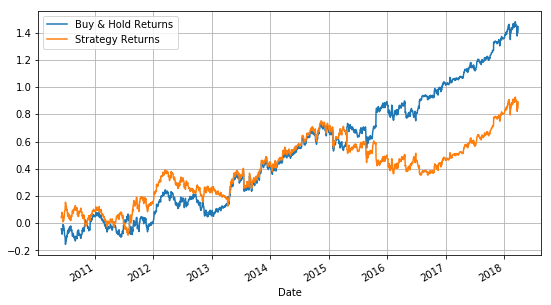

In [165]:
frame[['Buy & Hold Returns', 'Strategy Returns']].cumsum().plot(grid=True, figsize=(9,5))


### Downloading Data for Multiple Stocks

We can download data for stocks in multiple ways using the APIs provided by data vendors.
Data vendors provide the the data in different formats and so the methods used to download it, and clean it vary slightly. I've adapted the approach from [here](https://gist.github.com/CNuge).

Please ensure that your `pandas-datareader` is installed and working.

```python

import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
from concurrent import futures
```
The `futures` module in the library `concurrent` provides a high level API to perform parallel tasks. This works like a charm when you have a lot of data to download since it can happen in parallel. All the tickers will be downloaded at the same time, not one after another



In [167]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
from concurrent import futures

In [170]:
def download_stocks(stock):
    try:
        print('Trying to retrieve the %s symbol...\n' % (stock))
        stock_df = web.DataReader(stock, 'yahoo', start, end)
        stock_df['Name'] = stock
        output_name = stock + '.csv'
        list_stocks.append(output_name)
        stock_df.to_csv(output_name)
        print('Symbol %s downloaded OK.\n' % (stock))
    except:
        bad_tickers.append(stock)
        print('Problems downloading the %s symbol.\n' % (stock))

In [171]:
%time
stocksList = ['MSFT', 'AAPL', 'IBM', 'DELL', 'HP', 
              'TSLA', 'AMZN', 'AIG', 'STJ', 'WMT', 
              'LVLT', 'SBUX', 'CL', 'NKE', 'FOSL']
list_stocks = []

### Keeping track of failed ticker download queries
bad_tickers = []

end = datetime.datetime.now().date()
start = end - pd.Timedelta(days = 365 * 5)

# We use the concurrent.futures module's ThreadPoolExecutor 
# to speed up the downloads by doing them in parallel rather than serially
    
### Set the maximum thread number
max_workers = 50

workers = min(max_workers, len(stocksList)) 
### In case a smaller number of stocks than threads was passed in
with futures.ThreadPoolExecutor(workers) as executor:
    res = executor.map(download_stocks, stocksList)
### map allows multiple calls to the given function. It passes each of the items in stocksList (any 
### iterable) to the function. Here, it can happen concurrently because of the ThreadPoolExecutor()
### subClass

Wall time: 0 ns
Trying to retrieve the MSFT symbol...

Trying to retrieve the AAPL symbol...
Trying to retrieve the IBM symbol...


Trying to retrieve the DELL symbol...

Trying to retrieve the HP symbol...
Trying to retrieve the TSLA symbol...


Trying to retrieve the AMZN symbol...
Trying to retrieve the AIG symbol...


Trying to retrieve the STJ symbol...

Trying to retrieve the WMT symbol...

Trying to retrieve the LVLT symbol...

Trying to retrieve the SBUX symbol...

Trying to retrieve the CL symbol...

Trying to retrieve the NKE symbol...

Trying to retrieve the FOSL symbol...

Problems downloading the DELL symbol.

Problems downloading the STJ symbol.

Problems downloading the LVLT symbol.

Symbol AIG downloaded OK.
Symbol TSLA downloaded OK.


Symbol IBM downloaded OK.
Symbol WMT downloaded OK.


Symbol AMZN downloaded OK.

Symbol MSFT downloaded OK.

Symbol HP downloaded OK.

Symbol AAPL downloaded OK.

Symbol SBUX downloaded OK.

Symbol CL downloaded OK.

Symbol FOSL downloa

#### References

1. The `pandas-datareader` library documentation - http://pandas-datareader.readthedocs.io/en/latest/#
2. The Python `datetime` documentation - https://docs.python.org/3/library/datetime.html#module-datetime
3. The `dateutil` library documentation - https://dateutil.readthedocs.io/en/stable/
4. Examples for dealing with dates and times in Python - https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html
3. Faber, Meb, A Quantitative Approach to Tactical Asset Allocation (February 1, 2013). The Journal of Wealth Management, Spring 2007 . Available at SSRN: https://ssrn.com/abstract=962461
3. Documentation on the `.nonzero()` method in `NumPy` : https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.nonzero.html
4. Documentation on `pandas DataFrame .apply()` function: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html
5. https://stackoverflow.com/
6. `MatPlotlib` tutorial - http://www.scipy-lectures.org/intro/matplotlib/index.html
